In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import os
import math

***Pre-Processing the dataset***

In [2]:
'''Pulling the photos from folders with their paths'''

path_0 = []
train_path_0 = "../input/hand-sign-language-digit-dataset-for-0-5/0/"                #zero
for path in os.listdir(train_path_0):
    if '.JPG' in path:
        path_0.append(os.path.join(train_path_0, path))
        
path_1 = []
train_path_1 = "../input/hand-sign-language-digit-dataset-for-0-5/1/"                #one
for path in os.listdir(train_path_1):
    if '.JPG' in path:
        path_1.append(os.path.join(train_path_1, path))
        
path_2 = []
train_path_2 = "../input/hand-sign-language-digit-dataset-for-0-5/2/"                #two
for path in os.listdir(train_path_2):
    if '.JPG' in path:
        path_2.append(os.path.join(train_path_2, path))
        
path_3 = []
train_path_3 = "../input/hand-sign-language-digit-dataset-for-0-5/3/"                #three
for path in os.listdir(train_path_3):
    if '.JPG' in path:
        path_3.append(os.path.join(train_path_3, path))
        
path_4 = []
train_path_4 = "../input/hand-sign-language-digit-dataset-for-0-5/4/"                #four
for path in os.listdir(train_path_4):
    if '.JPG' in path:
        path_4.append(os.path.join(train_path_4, path))
        
path_5 = []
train_path_5 = "../input/hand-sign-language-digit-dataset-for-0-5/5/"                #five
for path in os.listdir(train_path_5):
    if '.JPG' in path:
        path_5.append(os.path.join(train_path_5, path))

len(path_0), len(path_1), len(path_2), len(path_3), len(path_4), len(path_5)

(205, 206, 206, 206, 207, 207)

In [3]:
'''Load training set'''

'''total pics in training set =  1237
    training_set = 1110 --- 185 for each digit
    validation_set = 120 --- 20 for each digit'''

train_set_orig = np.zeros((1110, 64, 64, 3), dtype='float32')
for i in range(185):                                                                #loading "zero"
    image = Image.open(path_0[i])
    img_resized = image.resize((64,64))
    train_set_orig[i] = np.asarray(img_resized)

for i in range(185, 370):                                                           #loading "one"
    image = Image.open(path_1[i - 185])
    img_resized = image.resize((64,64))
    train_set_orig[i] = np.asarray(img_resized)
        
for i in range(370, 555):                                                           #loading "two"
    image = Image.open(path_2[i - 370])
    img_resized = image.resize((64,64))
    train_set_orig[i] = np.asarray(img_resized)
        
for i in range(555, 740):                                                           #loading "three"
    image = Image.open(path_3[i - 555])
    img_resized = image.resize((64,64))
    train_set_orig[i] = np.asarray(img_resized)
        
for i in range(740, 925):                                                           #loading "four"
    image = Image.open(path_4[i - 740])
    img_resized = image.resize((64,64))
    train_set_orig[i] = np.asarray(img_resized)
        
for i in range(925, 1110):                                                          #loading "five"
    image = Image.open(path_5[i - 925])
    img_resized = image.resize((64,64))
    train_set_orig[i] = np.asarray(img_resized)


In [4]:
'''Load validation set'''

val_set_orig = np.zeros((120, 64, 64, 3), dtype='float32')
for i in range(20):                                                                 #loading "zero"
    image = Image.open(path_0[i + 185])
    img_resized = image.resize((64,64))
    val_set_orig[i] = np.asarray(img_resized)
    
for i in range(20, 40):                                                             #loading "one"
    image = Image.open(path_1[i + 165])
    img_resized = image.resize((64,64))
    val_set_orig[i] = np.asarray(img_resized)
    
for i in range(40, 60):                                                             #loading "two"
    image = Image.open(path_2[i + 145])
    img_resized = image.resize((64,64))
    val_set_orig[i] = np.asarray(img_resized)
    
for i in range(60, 80):                                                             #loading "three"
    image = Image.open(path_3[i + 125])
    img_resized = image.resize((64,64))
    val_set_orig[i] = np.asarray(img_resized)

for i in range(80, 100):                                                            #loading "four"
    image = Image.open(path_4[i + 105])
    img_resized = image.resize((64,64))
    val_set_orig[i] = np.asarray(img_resized)
    
for i in range(100, 120):                                                           #loading "five"
    image = Image.open(path_5[i + 85])
    img_resized = image.resize((64,64))
    val_set_orig[i] = np.asarray(img_resized)

In [5]:
'''Labelling the training set having 6-dimensional vector of o's and 1's with 1 where index = digit and zero otherwise'''

train_y_ = np.zeros((1110, 6))
for i in range(185):                                                               #labelling "zero"
    train_y_[i, 0] = 1

for i in range(185, 370):                                                          #labelling "one"
    train_y_[i, 1] = 1
        
for i in range(370, 555):                                                          #labelling "two"
    train_y_[i, 2] = 1
        
for i in range(555, 740):                                                          #labelling "three"
    train_y_[i, 3] = 1
    
for i in range(740, 925):                                                          #labelling "four"
    train_y_[i, 4] = 1
        
for i in range(925, 1110):                                                         #labelling "five"
    train_y_[i, 5] = 1


In [6]:
'''Labelling the validation set having 6-dimensional vector of o's and 1's with 1 where index = digit and zero otherwise'''

val_y_ = np.zeros((120, 6))
for i in range(20):                                                                 #labelling "zero"
    val_y_[i, 0] = 1

for i in range(20, 40):                                                             #labelling "one"
    val_y_[i, 1] = 1
        
for i in range(40, 60):                                                             #labelling "two"
    val_y_[i, 2] = 1
        
for i in range(60, 80):                                                             #labelling "three"
    val_y_[i, 3] = 1
        
for i in range(80, 100):                                                            #labelling "four"
    val_y_[i, 4] = 1
        
for i in range(100, 120):                                                           #labelling "five"
    val_y_[i, 5] = 1


In [7]:
''''Suffling training set pics'''

np.random.seed(0)
m_train = train_set_orig.shape[0]
permutation = list(np.random.permutation(m_train))
train_set_x = train_set_orig[permutation, :]
train_y = train_y_[permutation, :].T

''''Suffling validation set pics'''

np.random.seed(1)
m_val = val_set_orig.shape[0]
permutation = list(np.random.permutation(m_val))
val_set_x = val_set_orig[permutation, :]
val_y = train_y_[permutation, :].T

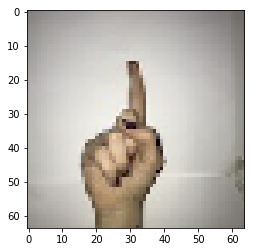

[0. 1. 0. 0. 0. 0.]


In [8]:
'''Example of an image'''

index = 100
plt.imshow(np.uint8(train_set_x[index]), interpolation='nearest')
plt.show()
print(train_y[:, index])

***Summary of Processed data***

In [9]:
m_train = train_set_x.shape[0]
m_val = val_set_x.shape[0]
num_px = train_set_x.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of validation examples: m_val = " + str(m_val))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("val_set_x shape: " + str(val_set_x.shape))
print ("val_set_y shape: " + str(val_y.shape))

Number of training examples: m_train = 1110
Number of validation examples: m_val = 120
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (1110, 64, 64, 3)
train_set_y shape: (6, 1110)
val_set_x shape: (120, 64, 64, 3)
val_set_y shape: (6, 120)


***Flattening the training and validation arrays***

In [10]:
train_x = train_set_x.reshape(1110,-1).T
val_x = val_set_x.reshape(120,-1).T

print ("train_set_x_flatten shape: " + str(train_x.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("val_set_x_flatten shape: " + str(val_x.shape))
print ("val_set_y shape: " + str(val_y.shape))

train_set_x_flatten shape: (12288, 1110)
train_set_y shape: (6, 1110)
val_set_x_flatten shape: (12288, 120)
val_set_y shape: (6, 120)


In [11]:
'''Standardizing dataset'''

train_x = train_x /255
val_x = val_x/255

***Model For Sign language Prediction***

In [12]:
def sigmoid(z):
    
    '''Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)'''
    
    s = 1/(1 + np.exp(-z))
    
    return s, z

In [13]:
def softmax(z):
    
    '''Compute the softmax of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- softmax(z)'''
    
    s = np.exp(z) / np.sum(np.exp(z), axis=0)
    
    return s, z

In [14]:
def initialize_parameters(layer_dims):
    
    """Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL","bL":
    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
    bl -- bias vector of shape (layer_dims[l], 1)"""
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)                                                                              #number of layers in the network
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
    assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    
    return parameters

In [15]:
def linear_forward(A, W, b):
    
    """Implement the linear part of a layer's forward propagation.
    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previouslayer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    Returns:
    Z -- the input of the activation function, also called pre-activation parameter
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently"""
    
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    
    cache = (A, W, b)
    
    return Z, cache

In [16]:
def linear_activation_forward(A_prev, W, b, activation):
    
    """Implement the forward propagation for the LINEAR->ACTIVATION layer
    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "softmax"
    Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python tuple containing "linear_cache" and "activation_cache"; stored for computing the backward pass efficiently"""
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    else:
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [17]:
def forward_propagation(X, parameters):
    
    """Implement forward propagation for the [LINEAR->SIGMOID]*(L-1)->LINEAR->SOFTMAX computation
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing: every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)"""
    
    caches = []
    A = X
    L = len(parameters) // 2                                                             #number of layers in the neural network
    
    #Implement [LINEAR -> SIGMOID]*(L-1). Add "cache" to the "caches" list.
    
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "sigmoid")
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "softmax")
    caches.append(cache)
    
    assert(AL.shape == (6,X.shape[1]))
    
    return AL, caches

In [18]:
def compute_cost(AL, Y):
    
    """Implement the cost function.
    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (6, number of examples)
    Y -- true "label" vector, shape (6, number of examples)
    Returns:
    cost -- cross-entropy cost"""
    
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))/m
    cost = np.squeeze(cost)
    
    assert(cost.shape == ())
    
    return cost

In [19]:
def linear_backward(dZ, cache):
    
    """Implement the linear portion of backward propagation for a single layer (layer l)
    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b"""
    
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T)/m
    db = np.sum(dZ, axis = 1, keepdims = True)/m
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [20]:
def sigmoid_backward(dA, Z):
    
    '''Implements the backward propagation for SIGMOID unit. 
    Arguments:
    dA -- post-activation gradient for current layer l
    Z -- activation cache for current layer l
    Returns:
    dZ -- dA ∗ g′(Z), g(.) is the sigmoid function'''
    
    A, activation_cache = sigmoid(Z)
    dZ = dA * (A * (1 - A))
    
    return dZ

In [21]:
def linear_activation_backward(dA, cache):
    
    """Implement the backward propagation for the LINEAR->ACTIVATION layer.
    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b"""
    
    linear_cache, activation_cache = cache
    dZ = sigmoid_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [22]:
def backward_propagation(AL, Y, caches):
    
    """Implement the backward propagation for the [LINEAR->SIGMOID] * (L-1) -> LINEAR -> SOFTMAX group
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector
    caches -- list of caches containing: every cache of linear_activation_forward() with "sigmoid" (it's caches[l],
    for l in range(L-1) i.e l = 0...L-2) the cache of linear_activation_forward() with "softmax" (it's caches[L-1])
    Returns:
    grads -- A dictionary with the gradients
    grads["dA" + str(l)] = ...
    grads["dW" + str(l)] = ...
    grads["db" + str(l)] = ..."""
    
    grads = {}
    L = len(caches)                                                                        #number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)                                                                #after this line, Y is the same shape as AL
    
    #Initializing the backpropagation
    
    dZL = AL - Y
    
    current_cache = caches[L-1]
    linear_cache, activation_cache = caches[L - 1]
    A_prev, W, b = linear_cache
    grads["dW" + str(L)] = np.dot(dZL, A_prev.T)/m
    grads["db" + str(L)] = np.sum(dZL, axis = 1, keepdims = True)/m
    grads["dA" + str(L-1)] = np.dot(W.T, dZL)
    
    for l in reversed(range(L - 1)):                                                       # lth layer: (SIGMOID -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads

In [23]:
def random_mini_batches(X, Y, mini_batch_size, seed = 0):
    
    '''Creates a list of random minibatches from (X, Y)
    Arguments:
    X -- input data, of shape (number of examples, input size)
    Y -- true "label" vector (1 for cat / 0 for dog), of shape (number of examples, 1)
    mini_batch_size -- size of the mini-batches, integer
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)'''
    
    np.random.seed(seed)            
    m = X.shape[1]                                                          #number of training examples
    mini_batches = []
        
    #Shuffle (X, Y)
    
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation]

    #Partition (shuffled_X, shuffled_Y). Minus the end case.
    
    num_complete_minibatches = math.floor(m/mini_batch_size)                #number of mini batches of size mini_batch_size in your partitionning
    
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    #Handling the end case (last mini-batch < mini_batch_size)
    
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, mini_batch_size * num_complete_minibatches::]
        mini_batch_Y = shuffled_Y[:, mini_batch_size * num_complete_minibatches::]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [24]:
def initialize_adam(parameters) :
    
    """Initializes v and s as two python dictionaries with:
    - keys: "dW1", "db1", ..., "dWL", "dbL" 
    - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                  parameters["W" + str(l)] = Wl
                  parameters["b" + str(l)] = bl
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ..."""
    
    L = len(parameters) // 2                                                  #number of layers in the neural networks
    v = {}
    s = {}
    
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape))
        v["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape))
        s["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape))
        s["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape))
        
    return v, s

In [25]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    
    """Update parameters using Adam
    Arguments:
    parameters -- python dictionary containing your parameters:
                  parameters['W' + str(l)] = Wl
                  parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
             grads['dW' + str(l)] = dWl
             grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary"""
    
    L = len(parameters) // 2                                                          #number of layers in the neural networks
    v_corrected = {}                                                                  #Initializing first moment estimate, python dictionary
    s_corrected = {}                                                                  #Initializing second moment estimate, python dictionary
    
    for l in range(L):
        #Moving average of the gradients.
        
        v["dW" + str(l+1)] = beta1*v['dW' + str(l+1)] + (1 - beta1)*grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta1*v['db' + str(l+1)] + (1 - beta1)*grads['db' + str(l+1)]

        #Compute bias-corrected first moment estimate.
        
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1 - beta1**t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1 - beta1**t)

        #Moving average of the squared gradients.
        
        s["dW" + str(l+1)] = beta2*s["dW" + str(l+1)] + (1 - beta2)*(grads['dW' + str(l+1)]**2)
        s["db" + str(l+1)] = beta2*s["db" + str(l+1)] + (1 - beta2)*(grads['db' + str(l+1)]**2)

        #Compute bias-corrected second raw moment estimate.
        
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1 - beta2**t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1 - beta2**t)

        #Update parameters.
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*(v_corrected["dW" + str(l+1)])/(np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*(v_corrected["db" + str(l+1)])/(np.sqrt(s_corrected["db" + str(l+1)]) + epsilon)

    return parameters, v, s

In [26]:
def predict(Y):
    
    '''Predict whether the labels using learned parameters (w, b)
    Arguments:
    Y -- a numpy array (vector) containing true labels
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions'''
    
    m = Y.shape[1]
    Y_prediction = np.zeros(Y.shape)

    for i in range(m):
        c = np.where(Y[:, i] == np.amax(Y[:, i]))
        Y_prediction[c[0], i] = 1
        
    return Y_prediction

In [27]:
def model(X, Y, X_val, Y_val, layers_dims, learning_rate = 0.01, mini_batch_size = 32, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    
    """L-layer neural network model which can be run in adam optimizer modes.
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    Y -- true "label" vector, of shape (6, number of examples)
    X_val -- test set represented by a numpy array of shape (m_test, num_px * num_px * 3)
    Y_val -- test labels represented by a numpy array (vector) of shape (m_test, 6)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate
    mini_batch_size -- the size of a mini batch
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 50 epochs
    Returns:
    d -- dictionary containing information about the model."""

    d = {}
    L = len(layers_dims)                                        #number of layers in the neural networks
    costs = []                                                  #to keep track of the cost
    t = 0                                                       #initializing the counter required for Adam update
    seed = 10                                                   #For grading purposes, so that your "random" minibatches are the same as ours
    
    #Initialize parameters
    
    parameters = initialize_parameters(layers_dims)
    
    v, s = initialize_adam(parameters)
    
    #Optimization loop
    
    for i in range(num_epochs):
        
        #Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        m = len(minibatches)
        cost_total = 0
        
        for minibatch in minibatches:

            #Select a minibatch
            
            (minibatch_X, minibatch_Y) = minibatch

            #Forward propagation
            
            AL, caches = forward_propagation(minibatch_X, parameters)

            #Compute cost and add to the cost total
            
            cost_total += compute_cost(AL, minibatch_Y)

            #Backward propagation
            
            grads = backward_propagation(AL, minibatch_Y, caches)

            #Update parameters
            
            t = t + 1                                                                                  #Adam counter
            parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        #Print the cost every 100 epoch
        
        if print_cost and i % 50 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 50 == 0:
            costs.append(cost_avg)
            
    AL_train, c1 = forward_propagation(X, parameters)
    AL_val, c2 = forward_propagation(X_val, parameters)
    Y_prediction_val = predict(AL_val)
    Y_prediction_train = predict(AL_train)
    
    print("train set accuracy for model: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y)) * 100))
    print("validation set accuracy for model: {} %".format(100 - np.mean(np.abs(Y_prediction_val - Y_val)) * 100))
                
    d = {"costs": costs,
         "Y_prediction_val": Y_prediction_val,
         "Y_prediction_train" : Y_prediction_train,
         "parameters": parameters,
         "learning_rate": learning_rate,
         "num_epochs": num_epochs}
    
    return d

In [28]:
layers_dims = [12288, 24, 12, 6]
d = model(train_x, train_y, val_x, val_y, layers_dims, learning_rate = 0.0001, mini_batch_size = 32, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 500, print_cost = True)

Cost after epoch 0: 2.703662
Cost after epoch 50: 2.413085
Cost after epoch 100: 2.132620
Cost after epoch 150: 1.930738
Cost after epoch 200: 1.775847
Cost after epoch 250: 1.665910
Cost after epoch 300: 1.575757
Cost after epoch 350: 1.447649
Cost after epoch 400: 1.299552
Cost after epoch 450: 1.092606
train set accuracy for model: 98.52852852852853 %
validation set accuracy for model: 72.22222222222223 %


***Learning Curve***

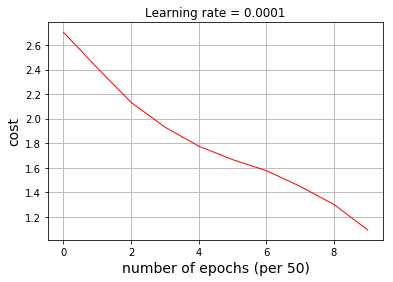

In [29]:
plt.plot(d["costs"], c="r", linewidth=1)
plt.ylabel('cost', fontsize=14)
plt.xlabel("number of epochs (per 50)", fontsize=14)
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.grid()